In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We have to answer on following question as analysts:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

**ID**: An id used to identify the participant of the survey 
<br>
**SeparationType**: The reason why the person's employment ended
<br>
**Cease Date**: The year or month the person's employment ended
<br>
**DETE Start Date**: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

**Record ID**: An id used to identify the participant of the survey
<br>
**Reason for ceasing employment**: The reason why the person's employment ended
<br>
**LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the person's employment (in years)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
#read first survey data
first_survey=pd.read_csv('dete_survey.csv')
first_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
first_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [8]:
#read second survey data
sec_survey=pd.read_csv('tafe_survey.csv')
sec_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
sec_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

## Data Cleaning

In [9]:
# The first_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
f_survey = pd.read_csv('dete_survey.csv', 
                 na_values = "Not Stated")
f_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
#some columns won't used in our analysis. Drop them
f_survey_update=f_survey.drop(f_survey.columns[28:49], axis=1)
f_survey_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
sec_survey_update=sec_survey.drop(sec_survey.columns[17:66], axis=1)
sec_survey_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

To combine two tables we'll have to standardize the column names.

first - second tables:
Age - Current Age.CurretAge
Gender - Gender.What is your Gender?
Cease Date - Cessation year
separation tupe - reason for ceasing
ID - Record ID

In [12]:
f_survey_update.columns=f_survey_update.columns.str.lower().str.replace(' ','_')

In [13]:
f_survey_update.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
new_columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
sec_survey_update.rename(columns=new_columns, inplace=True)

In [15]:
sec_survey_update.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [16]:
f_survey_update['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [17]:
sec_survey_update['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

 For this project, we'll only analyze survey respondents who __resigned__, so their separation type contains the string *'Resignation'*

In [18]:
sec_resignation = sec_survey_update[sec_survey_update['separationtype']=='Resignation']
sec_resignation.shape #see that new dataframe was reduced

(340, 23)

In [19]:
f_resignation = f_survey_update[f_survey_update['separationtype'].str.contains('Resignation', na=False)]
f_resignation.shape 

(311, 35)

In [21]:
f_resignation['institute_service']=f_resignation['cease_date']-f_resignation['dete_start_date']
# we saw error due to case_date is object type and we could not substract from float

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [22]:
f_res=f_resignation.copy()

In [23]:
f_res['cease_year']=f_res['cease_date'].str.extract(r'([1-2][0-9]{3})').astype(float)
f_res['cease_year']

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_year, Length: 311, dtype: float64

In [24]:
f_res['institute_service']=f_res['cease_year']-f_res['dete_start_date']
f_res['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

Next, we'll identify any employees who resigned because they were dissatisfied.
I will use next columns to categorize employees as "dissatisfied":

**first_table**:
- job_dissatisfaction
- dissatisfaction_with_the_department
- lack_of_recognition
- lack_of_job_security
- work_life_balance


**second_table**:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [25]:
sec_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
sec_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def dissatisfaction(element):
    if element==np.nan:
        return np.nan
    elif element=='-':
        return False
    else: return True


                

In [29]:
two=sec_resignation.copy()
two[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']]=two[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(dissatisfaction)
two[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].head()

,Contributing Factors. Job Dissatisfaction,Contributing Factors. Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


In [30]:
two['dissatisfied']=two[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].any(axis=1)

In [31]:
two['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

Create 'dissatisfied' column for first table:

In [32]:
first = f_res.copy()

In [33]:
first['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [34]:
first['dissatisfaction_with_the_department'].value_counts()

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [35]:
first['lack_of_recognition'].value_counts()

False    278
True      33
Name: lack_of_recognition, dtype: int64

In [36]:
first['lack_of_job_security'].value_counts()

False    297
True      14
Name: lack_of_job_security, dtype: int64

In [37]:
first['work_life_balance'].value_counts()

False    243
True      68
Name: work_life_balance, dtype: int64

In [38]:
#we won't need to create boolean value for our parameters. Let's create column 'dissatisfied'
first['dissatisfied']=first[['work_life_balance','lack_of_job_security','lack_of_recognition','dissatisfaction_with_the_department','job_dissatisfaction']].any(axis=1)
first['dissatisfied'].value_counts()

False    182
True     129
Name: dissatisfied, dtype: int64

Now we ready to combine our datasets

In [39]:
first['institute']='DETE' # allow to identify data from DETE in combined table 

In [40]:
two['institute']='TAFE'

In [96]:
first_to_comb=first[['institute_service','dissatisfied', 'institute','age','employment_status','gender']]
first_to_comb.head()
first_copy=first_to_comb.copy()

In [97]:
first_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   institute_service  273 non-null    float64
 1   dissatisfied       311 non-null    bool   
 2   institute          311 non-null    object 
 3   age                306 non-null    object 
 4   employment_status  307 non-null    object 
 5   gender             302 non-null    object 
dtypes: bool(1), float64(1), object(4)
memory usage: 14.9+ KB


In [98]:
first_copy.dropna(axis=0, how='all', inplace=True)

In [99]:
first_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   institute_service  273 non-null    float64
 1   dissatisfied       311 non-null    bool   
 2   institute          311 non-null    object 
 3   age                306 non-null    object 
 4   employment_status  307 non-null    object 
 5   gender             302 non-null    object 
dtypes: bool(1), float64(1), object(4)
memory usage: 14.9+ KB


In [92]:
two_to_comb=two[['institute_service','dissatisfied', 'institute','age','employment_status','gender']]
two_to_comb.head()

,institute_service,dissatisfied,institute,age,employment_status,gender
3,NaN,False,TAFE,NaN,NaN,NaN
4,3-4,False,TAFE,41 45,Permanent Full-time,Male
5,7-10,False,TAFE,56 or older,Contract/casual,Female
6,3-4,False,TAFE,20 or younger,Temporary Full-time,Male
7,3-4,False,TAFE,46 50,Permanent Full-time,Male


In [100]:
two_copy=two_to_comb.copy()
two_copy.dropna(axis=0, how='any', inplace=True)

In [101]:
two_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 4 to 701
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institute_service  290 non-null    object
 1   dissatisfied       290 non-null    bool  
 2   institute          290 non-null    object
 3   age                290 non-null    object
 4   employment_status  290 non-null    object
 5   gender             290 non-null    object
dtypes: bool(1), object(5)
memory usage: 13.9+ KB


In [108]:
two_copy['institute_service'].mask(two_copy['institute_service']=='More than 20 years','20', inplace=True)

In [109]:
two_copy['institute_service'].mask(two_copy['institute_service']=='Less than 1 year','1', inplace=True)
two_copy['institute_service'].astype(str)

4       3-4
5      7-10
6       3-4
7       3-4
8       3-4
       ... 
693     1-2
696     5-6
697     1-2
699     5-6
701     3-4
Name: institute_service, Length: 290, dtype: object

In [110]:
two_copy['institute_service'].value_counts()

1        73
1-2      64
3-4      63
5-6      33
11-20    26
7-10     21
20       10
Name: institute_service, dtype: int64

In [112]:
two_copy['institute_service'].mask(two_copy['institute_service']=='11-20','11', inplace=True)

In [113]:
two_copy['institute_service'].value_counts()

1       73
1-2     64
3-4     63
5-6     33
11      26
7-10    21
20      10
Name: institute_service, dtype: int64

In [115]:
two_copy['institute_service']=two_copy['institute_service'].str.split('-').str[0]

In [116]:
two_copy['institute_service'].value_counts()

1     64
3     63
5     33
11    26
7     21
Name: institute_service, dtype: int64

We extract years from columns institute_service for TARE-survey

In [117]:
combined = pd.concat([first_to_comb,two_copy])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 3 to 701
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institute_service  480 non-null    object
 1   dissatisfied       601 non-null    bool  
 2   institute          601 non-null    object
 3   age                596 non-null    object
 4   employment_status  597 non-null    object
 5   gender             592 non-null    object
dtypes: bool(1), object(5)
memory usage: 28.8+ KB


In [124]:
combined[combined['institute_service'].isnull()] 
# due to we have to answer a question "How correlate institute_servise vs satisfaction", it's possible to remove row with missing institute_servise

,institute_service,dissatisfied,institute,age,employment_status,gender
16,NaN,True,DETE,61 or older,Permanent Part-time,Male
39,NaN,True,DETE,21-25,Permanent Full-time,Female
106,NaN,True,DETE,46-50,Temporary Part-time,Female
140,NaN,False,DETE,51-55,Permanent Part-time,Female
196,NaN,False,DETE,46-50,Permanent Part-time,Female
...,...,...,...,...,...,...
677,NaN,False,TAFE,36 40,Temporary Full-time,Female
681,NaN,False,TAFE,26 30,Temporary Full-time,Female
682,NaN,False,TAFE,26 30,Permanent Part-time,Female
683,NaN,False,TAFE,41 45,Temporary Full-time,Female


In [125]:
combined.dropna(axis=0, how='any', inplace=True)

In [133]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 3 to 701
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institute_service  473 non-null    int64 
 1   dissatisfied       473 non-null    bool  
 2   institute          473 non-null    object
 3   age                473 non-null    object
 4   employment_status  473 non-null    object
 5   gender             473 non-null    object
dtypes: bool(1), int64(1), object(4)
memory usage: 22.6+ KB


In [145]:
combined['institute_service']=combined['institute_service'].astype(int)

In [148]:
combined['category']='Veteran'

In [149]:
conditions=[combined['institute_service']<3,combined['institute_service'].between(3,6),combined['institute_service'].between(6,11)]
cotegory=['New','Experienced','Established']

In [159]:
combined['category']=np.select(conditions,cotegory,'Veteran')

In [160]:
combined['category'].value_counts()
#to tackle that problem, we will convert data to category:
#- New: Less than 3 years at a company
#- Experienced: 3-6 years at a company
#- Established: 7-10 years at a company
#- Veteran: 11 or more years at a company

Experienced    171
New            119
Established     92
Veteran         91
Name: category, dtype: int64

In [161]:
combined['dissatisfied'].value_counts(dropna=False)

False    304
True     169
Name: dissatisfied, dtype: int64

In [163]:
combined.pivot_table(index='category', values='dissatisfied')

,dissatisfied
category,
Established,0.358696
Experienced,0.321637
New,0.294118
Veteran,0.505495


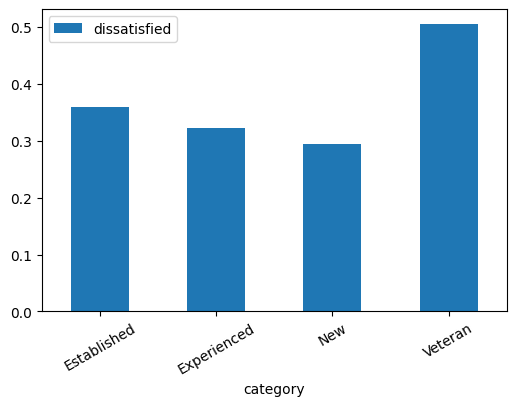

In [167]:
combined.pivot_table(index='category', values='dissatisfied').plot(kind='bar', rot=30)

**Conclusion**: Approximatly 50% of employees with more than 10+ years experiens dissatisfied. In other group we see equal satisfaction.


Now let's see how conclusion correlate with ages

In [168]:
combined['age'].value_counts()

51-55            52
41-45            44
36-40            36
41  45           35
46-50            33
46  50           31
26-30            31
31-35            28
21-25            26
21  25           26
36  40           24
56-60            22
56 or older      22
31  35           21
26  30           21
61 or older      16
20 or younger     5
Name: age, dtype: int64

In [170]:
combined['age']=combined['age'].str.split('-').str[0]

In [171]:
combined['age']=combined['age'].str.split(' ').str[0]

In [172]:
combined['age'].value_counts()

41    79
46    64
36    60
26    52
21    52
51    52
31    49
56    44
61    16
20     5
Name: age, dtype: int64

In [182]:
c=[combined['age'].le('30'),combined['age'].between('30','50')]
a=['Young','Middle']

In [183]:
combined['category_age']=np.select(c,a,"Old")

In [184]:
combined['category_age'].value_counts()

Middle    252
Old       112
Young     109
Name: category_age, dtype: int64

In [185]:
table=combined.pivot_table(index='age',values='dissatisfied')

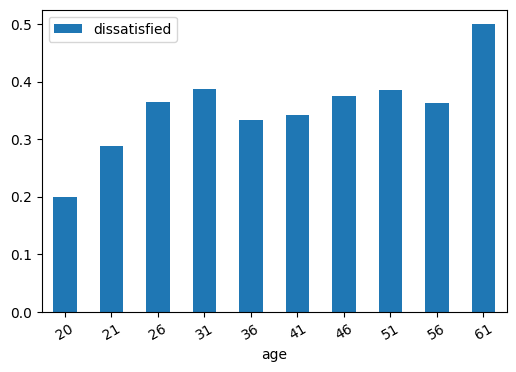

In [186]:
table.plot(kind='bar',rot=30)

**Conclusion**: Again we see that most dissatisfaed group is old humans with 10+ years experiens

In [ ]:
table1=combined.pivot_table(index='age',values='dissatisfied')

KeyError: 'institute_service'

In [59]:
a[a.isnull()].index.tolist()

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 29,
 32,
 36,
 37,
 39,
 40,
 41,
 42,
 45,
 46,
 47,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 63,
 64,
 65,
 66,
 69,
 71,
 72,
 74,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 109,
 113,
 114,
 116,
 118,
 119,
 121,
 122,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 145,
 148,
 149,
 150,
 151,
 152,
 153,
 159,
 160,
 161,
 164,
 167,
 168,
 169,
 172,
 174,
 175,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 189,
 191,
 192,
 193,
 194,
 196,
 197,
 200,
 203,
 204,
 207,
 208,
 211,
 215,
 217,
 220,
 221,
 224,
 228,
 229,
 231,
 233,
 234,
 235,
 236,
 237,
 238,
 240,
 241,
 242,
 243,
 245,
 246,
 254,
 256,
 258,
 259,
 263,
 270,
 274,
 275,
 276,
 277,
 279,
 280,
 287,
 288,
 293,
 294,
 295,
 299,
 301,
 303,
 307,
 310,
 312,
 315,
 316,
 320,

In [77]:
combined['institute_service'].str.extract(r'([0-9])')

,0
3,NaN
5,NaN
8,NaN
9,NaN
11,NaN
...,...
696,5
697,1
698,NaN
699,5


In [47]:
first.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,7.0,False,DETE
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,18.0,False,DETE
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0,False,DETE
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0,False,DETE


In [48]:
two.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [44]:
two.shape

(340, 25)